# ECON408: Assignment 4

Jesse Perla, UBC

## Student Name/Number: Alexander (Thê) Quach (62679758)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [6]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random, QuantEcon, NLsolve

## Question 1

Take the example in [Simple Example with iid
Income](https://jlperla.github.io/ECON408/lectures/permanent_income.html#/iid-income-lss)
where the stochastic process for income $y_t$ follows

$$
y_t = \mu + \sigma w_t \sim N(\mu, \sigma^2)
$$

Under these assumptions, with quadratic utility and if $\beta R = 1$ the
optimal policy is

$$
\mathbb{E}_t\{c_{t+1}\} = c_t
$$

Which we can use to derive for this income process if $F_0 = y_0 = 0$.

$$
c_t = (1-\beta)\left(\mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j y_{t+j}\right] + F_t\right) =  \mu + (1 - \beta) \sigma \sum_{j=1}^t w_j
$$

And finally

$$
F_t  = \sigma \sum_{j=1}^{t-1} w_j
$$

### Part (a)

Code to simulate this consumption process for $t = 1, \ldots T$ is given
below.

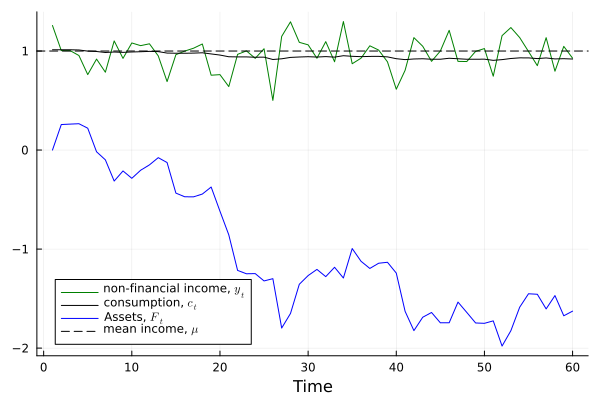

In [67]:
using Plots, Random
function simulate_iid_income(p, T; w = randn(T))
    w_sum = cumsum(w) #(w_1, w_1 + w_2, w_1 + w_2 + w_3, ... sum_{j=1}^T w_j))    
    c = p.mu .+ (1 - p.beta) * p.sigma  * w_sum # (c_1, c_2, ... c_T)
    y = p.mu .+ p.sigma * w # (y_1, y_2, ... y_T)
    F = [0.0; p.sigma * w_sum[1:end-1]] #(F_1, F_2, ... F_T)
    return (;w, F, c, y)
end

p = (;beta= 1.0 / (1.0 + 0.05), mu = 1, sigma = 0.15)
T = 60
res = simulate_iid_income(p, T)

plot(1:T, res.y, color = :green, label = L"non-financial income, $y_t$", xlabel="Time")
plot!(res.c, color = :black, label = L"consumption, $c_t$")
plot!(res.F, color = :blue, label = L"Assets, $F_t$")
hline!([p.mu], color = :black, linestyle = :dash, label = L"mean income, $\mu$")

Using this code, plot call the above where instead of randomly drawing
each $w \sim N(0,1)$ draw it from a distribution $w \sim N(0.5, 1)$ and
plot the results

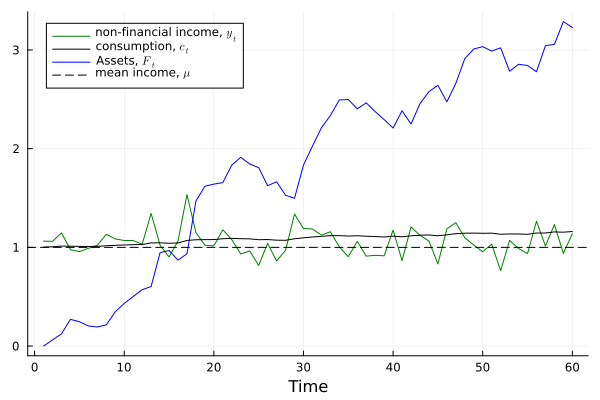

In [62]:
p = (;beta= 1.0 / (1.0 + 0.05), mu = 1, sigma = 0.15)
T = 60
res = simulate_iid_income(p, T, w = 0.5 .+ randn(T))

plot(1:T, res.y, color = :green, label = L"non-financial income, $y_t$", xlabel="Time")
plot!(res.c, color = :black, label = L"consumption, $c_t$")
plot!(res.F, color = :blue, label = L"Assets, $F_t$")
hline!([p.mu], color = :black, linestyle = :dash, label = L"mean income, $\mu$")

### Part (b)

Interpret the result of the previous graph with the standard one with
well-specified results from the perspective of consumption smoothing and
forecasting of income. In what ways is the behavior in the second case
not optimal and why?

By changing the mean from 0 to 0.5 we are increasing the mean fluctuation of income by 0.5, this means that consumption and assets follow paths that are shifted upwards compared to the original plot. This suggests that individuals may tend to consume more and accumulate more assets when their expected income level is higher. Although the consumption smoothing is still present, it is shifted upwards and therefore not optimal as in general $c_{t+1} > c_t$. This may suggest that agents are underestimating risk, overconsuming, suboptimally allocating their assets or inaccurately forecasting their financial planning. Therefore, the behaviour of agents is not optimal.

## Question 2

Continuing with income process defined in Part 1, rather than manually
implementing this process, [use the LSS
formulation](https://jlperla.github.io/ECON408/lectures/permanent_income.html#/stacked-lss-for-iid-income)

$$
\begin{aligned}
\begin{bmatrix} w_{t+1} \\ 1 \end{bmatrix} &= \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} w_t \\ 1 \end{bmatrix}+ \begin{bmatrix} 1 \\ 0 \end{bmatrix} w_{t+1}\\
y_t &= \begin{bmatrix} \sigma & \mu \end{bmatrix}\begin{bmatrix} w_t \\ 1 \end{bmatrix}
\end{aligned}
$$ From this, we can stack, etc. following [our
notes](https://jlperla.github.io/ECON408/lectures/permanent_income.html#/stacked-lss)

The simulation from the code was

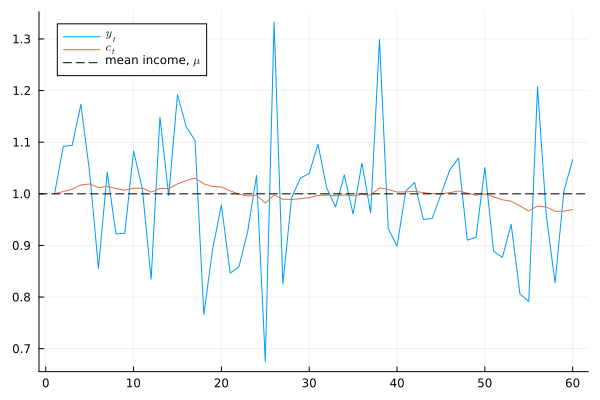

In [72]:
A = [0 0; 0 1]
G = [p.sigma p.mu]
C = [1; 0]
H = G*inv(I-p.beta*A)
A_tilde = [A zeros(2,1); H*(I-A) 1]
C_tilde = [C; 0]
G_tilde = [G 0; (1-p.beta)*H 1-p.beta]
x_tilde_0 = [0.0, 1, 0.0] #[w_0, 1, F_0]
lss_pi = LSS(A_tilde, C_tilde, G_tilde;
              mu_0 = x_tilde_0)
x, y = simulate(lss_pi, T)
plot(1:T, y[1,:];label=L"y_t", size=(600,400))
plot!(1:T, y[2,:], label=L"c_t")
hline!([p.mu], color=:black, linestyle=:dash,
       label = L"mean income, $\mu$")

### Part (a)

Try calculating the stationary distribution by modifying the code below
or trying with your existing code.

In [71]:
# modify here from previous results

A = [0 0; 0 1]
G = [p.sigma p.mu]
C = [1; 0]
H = G*inv(I-p.beta*A)
A_tilde = [A zeros(2,1); H*(I-A) 1]
C_tilde = [C; 0]
G_tilde = [G 0; (1-p.beta)*H 1-p.beta]
x_tilde_0 = [0.0, 1, 0.0] #[w_0, 1, F_0]
lss_pi = LSS(A_tilde, C_tilde, G_tilde;
              mu_0 = x_tilde_0)
x, y = simulate(lss_pi, T)
plot(1:T, y[1,:];label=L"y_t", size=(600,400))
plot!(1:T, y[2,:], label=L"c_t")
hline!([p.mu], color=:black, linestyle=:dash,
       label = L"mean income, $\mu$")
       
mu_x, mu_y, sigma_x, sigma_y = stationary_distributions(lss_pi)

ErrorException: Convergence failed after 201 iterations

Explain why it does or does not converge below

The process does not converge most likely due to the nature of the income process as defined by LSS. From the inital plot, we can see that the income is randomly varied around the mean income, as $t \rightarrow \infty$ it could be that the income does not converge to any stationary distrubution. This could suggest that it does not satisfy the ergodicity conditions required for convergence.

### Part (b)

Consider a variation on the state space model above where instead of the
state being above which puts the $\sigma$ in the

$$
C \equiv
\begin{bmatrix}
    \sigma \\
    0
\end{bmatrix}
$$

rather than in the $G$. Complete that state space model, and change the
implementation below (copied from the above for simplicity)

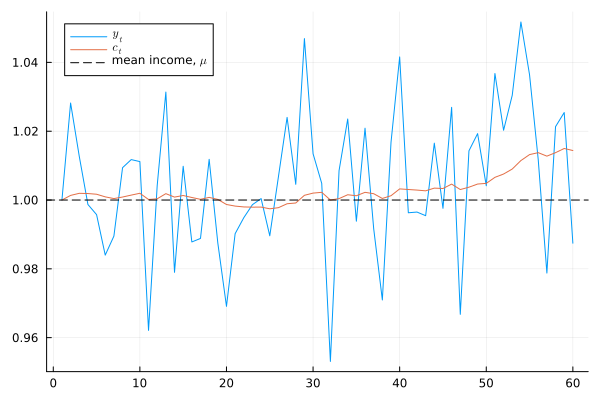

In [79]:
# Modify here
A = [0 0; 0 1]
G = [p.sigma p.mu]
C = [p.sigma; 0] # replace with $C = [\sigma; 0]$ and fix the rest of the LSS/etc.
H = G*inv(I-p.beta*A)
A_tilde = [A zeros(2,1); H*(I-A) 1]
C_tilde = [C; 0]
G_tilde = [G 0; (1-p.beta)*H 1-p.beta]
x_tilde_0 = [0.0, 1, 0.0] #[w_0, 1, F_0]
lss_pi = LSS(A_tilde, C_tilde, G_tilde;
              mu_0 = x_tilde_0)
x, y = simulate(lss_pi, T)
plot(1:T, y[1,:];label=L"y_t", size=(600,400))
plot!(1:T, y[2,:], label=L"c_t")
hline!([p.mu], color=:black, linestyle=:dash,
       label = L"mean income, $\mu$")

## Question 3

Recall the [Lake
Model](https://jlperla.github.io/ECON408/lectures/markov_chains_applications.html#/lake-model-of-unemployment-and-employment)
of unemployment and employment. Summarizing, while in the labor market,
workers are employed or unemployed, where

-   $\lambda$, the job finding rate for currently unemployed workers and
    $\alpha$ is the dismissal rate for currently employed workers
-   $b$ is the entry rate into the labor force, $d$ is the exit rate,
    and $g = b - d$. New entrance into the labor force is assumed to be
    unemployed.
-   $E_t$ is the total number of employed workers, $U_t$ is the total
    number of unemployed workers and $N_t = E_t + U_t$ is the total
    number of workers in the labor force.
-   The employment and unemployment rate are $e_t \equiv E_t / N_t$ and
    $u_t \equiv U_t / N_t$ respectively.
-   Define $X_t \equiv \left(\begin{matrix}U_t\\E_t\end{matrix}\right)$
    and $x_t \equiv \left(\begin{matrix}u_t\\e_t\end{matrix}\right)$.

With this, we constructed the equation for the evolution of the state
vector $X_{t+1}$ as

$$
X_{t+1} = \underbrace{\begin{bmatrix}
    (1-d)(1-\lambda) + b & (1-d)\alpha + b  \\
    (1-d)\lambda & (1-d)(1-\alpha)
\end{bmatrix}}_{\equiv A} X_t
$$

And

$$
x_{t+1} = \underbrace{\frac{1}{1 + g} A}_{\equiv \hat{A}} x_t
$$

Finally, the Markov chain for an agent (before exit) is

$$
P = \begin{bmatrix}
            1 - \lambda & \lambda \\
            \alpha & 1 - \alpha
        \end{bmatrix}
$$

In the lectures we had code for general simulations using a model and
collection of parameters

In [80]:
# Reusable functions, do not modify
function iterate_map(f, x0, T)
    x = zeros(length(x0), T + 1)
    x[:, 1] = x0
    for t in 2:(T + 1)
        x[:, t] = f(x[:, t - 1])
    end
    return x
end
function LakeModel(; lambda = 0.283, alpha = 0.013, b = 0.0124, d = 0.00822)
    g = b - d
    A = [(1 - lambda) * (1 - d)+b (1 - d) * alpha+b
         (1 - d)*lambda (1 - d)*(1 - alpha)]
    P = [(1 - lambda) lambda
         alpha 1 - alpha]
    A_hat = A ./ (1 + g)
    x_0 = ones(size(A_hat, 1)) / size(A_hat, 1)
    sol = fixedpoint(x -> A_hat * x, x_0)
    converged(sol) || error("Failed to converge in $(sol.iterations) iter")    
    x_bar =sol.zero
    return (; lambda, alpha, b, d, A, A_hat, x_bar, P)
end

LakeModel (generic function with 1 method)

Using the above code, we can solve for the dynamics of the stocks with

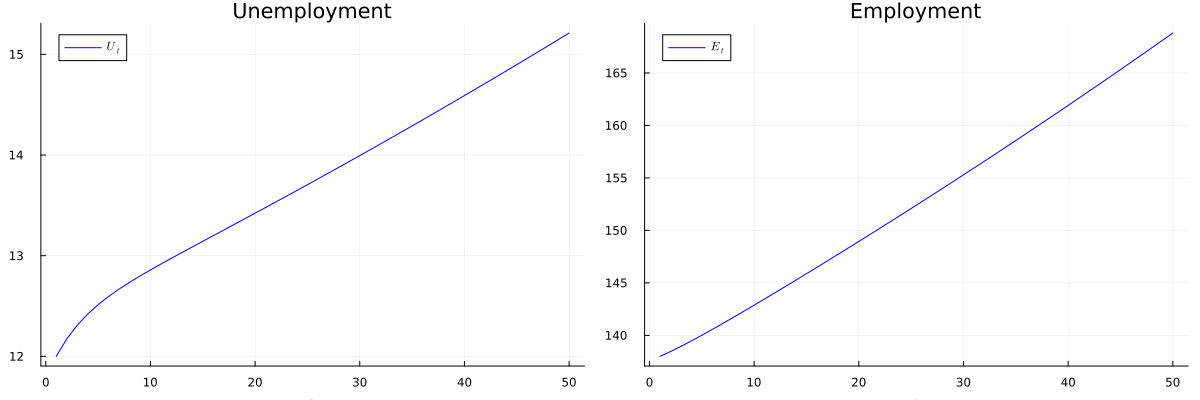

In [81]:
lm = LakeModel()
N_0 = 150
e_0 = 0.92
u_0 = 1 - e_0
T = 50
U_0 = u_0 * N_0
E_0 = e_0 * N_0
X_0 = [U_0; E_0]
X_path = iterate_map(X -> lm.A * X, X_0, T - 1)
x1 = X_path[1, :]
x2 = X_path[2, :]
plt_unemp = plot(1:T, X_path[1, :]; color = :blue,
                 label = L"U_t", xlabel="t", title = "Unemployment")
plt_emp = plot(1:T, X_path[2, :]; color = :blue,
               label = L"E_t", xlabel="t", title = "Employment")
plot(plt_unemp, plt_emp, layout = (1, 2), size = (1200, 400))

Similarly, we can plot the evolution of the employment and unemployment
rates after finding the steady state:

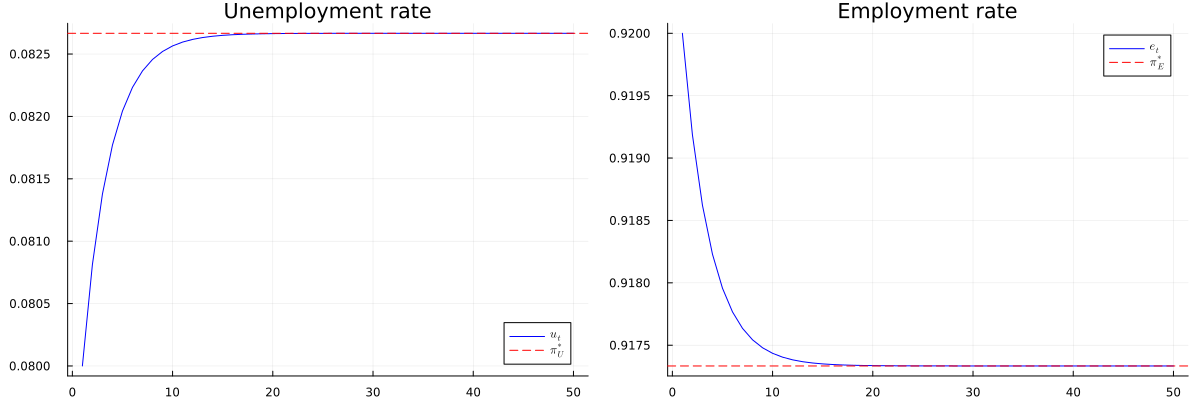

In [82]:
u_bar, e_bar = lm.x_bar
x_0 = [u_0; e_0]
x_path = iterate_map(x -> lm.A_hat * x, x_0, T - 1)
plt_unemp = plot(1:T, x_path[1, :];title = "Unemployment rate", 
                 color = :blue, label = L"u_t")
hline!(plt_unemp, [u_bar], color = :red, linestyle = :dash, label = L"\pi^{*}_U")
plt_emp = plot(1:T, x_path[2, :]; title = "Employment rate", color = :blue, label = L"e_t")
hline!(plt_emp, [e_bar], color = :red, linestyle = :dash,label = L"\pi^{*}_E")
plot(plt_unemp, plt_emp, layout = (1, 2), size = (1200, 400))

### Part (a)

Repeating the above code, plot the dynamics of the unemployment and
employment rates for the model with `b = d = 0`, but keeping all of the
other parameters as given.

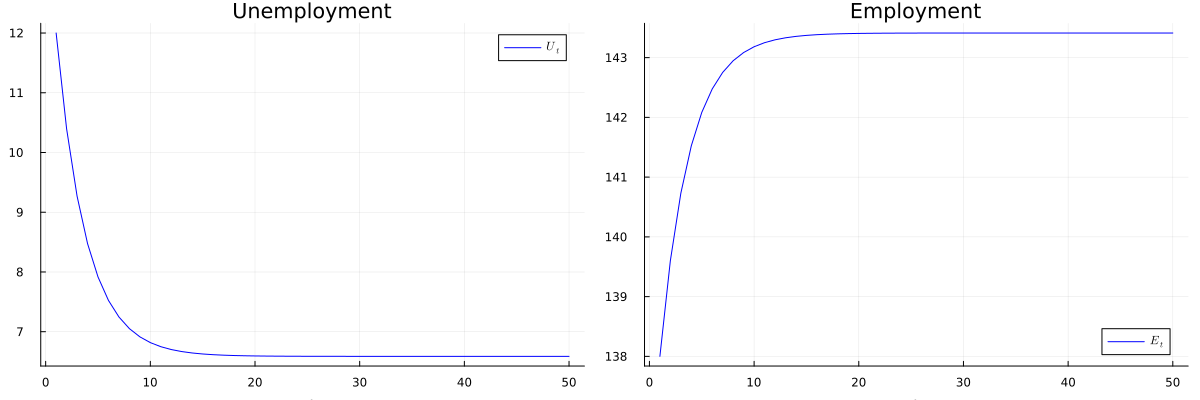

In [83]:
# edit your code here
lm = LakeModel(b = 0, d = 0)
N_0 = 150
e_0 = 0.92
u_0 = 1 - e_0
T = 50
U_0 = u_0 * N_0
E_0 = e_0 * N_0
X_0 = [U_0; E_0]
X_path = iterate_map(X -> lm.A * X, X_0, T - 1)
x1 = X_path[1, :]
x2 = X_path[2, :]
plt_unemp = plot(1:T, X_path[1, :]; color = :blue,
                 label = L"U_t", xlabel="t", title = "Unemployment")
plt_emp = plot(1:T, X_path[2, :]; color = :blue,
               label = L"E_t", xlabel="t", title = "Employment")
plot(plt_unemp, plt_emp, layout = (1, 2), size = (1200, 400))

Interpret why this is different from the previous case (talk about
transition dynamics as well as the steady-states)

This is different from the previous case because we can see that as t increases, the unemployement rate increases as the economy moves towards the steady state level of unemployement. This is most likely due to the death rates of employed people, who are replaced by the birth rate of unemployed people. When approaching the steady state level of unemployment there are $\pi^*_U$ people unemployed waiting for the employed people to die or are fired so that they can replace them. In the second example, since the birth and death rates are set to 0, which means no one is born and no one dies, so we are looking at the same N_0 people for $t = 0 ... \infty$. At the start, there are 12 people unemployed, as the economy moves towards the steady state, the unemployement rate drops and slowly approaches 6-ish as $t\rightarrow\infty$. This implies there there will always be 6 unemployed people in the economy, these may not be the same people as an employed person may move to the unemployed state which allows another to replace them. 

### Part (b)

The Markov chain for an individual starting in the employment state can
be simulated using the markov chain already calculated in our previous
code,

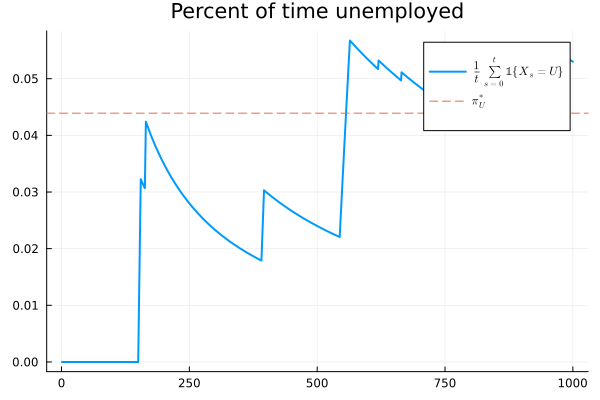

In [171]:
lm = LakeModel(;lambda = 0.283, alpha = 0.013, b = 0.0, d = 0.0)
T = 1000
mc = MarkovChain(lm.P, [0; 1])     # 0=unemployed, 1=employed
s_path = simulate(mc, T; init = 2)
u_bar, e_bar = stationary_distributions(mc)[1]
# Note mapping in MarkovChain
s_bar_e = cumsum(s_path) ./ (1:T)
s_bar_u = 1 .- s_bar_e
s_bars = [s_bar_u s_bar_e]
plot(title = "Percent of time unemployed",
 1:T, s_bars[:, 1], lw = 2,
 label=L"\frac{1}{t}\sum_{s=0}^t \mathbb{1}\{X_s = U\}",
 legend=:topright, size=(600, 400))
hline!([u_bar], linestyle = :dash,
       label = L"\pi^{*}_U")

Modify this same graph, but now start the agent in unemployed state,

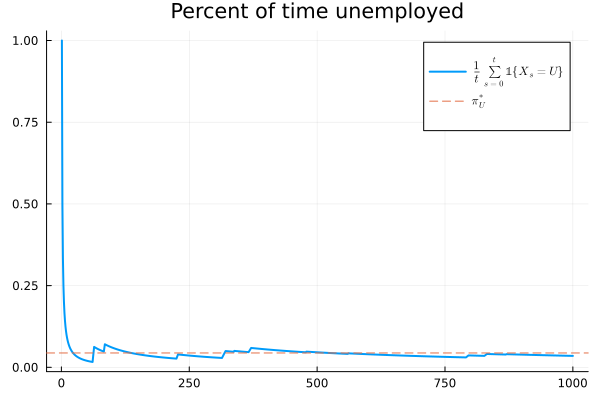

In [172]:
# edit your code here
s_path = simulate(mc, T; init = 1)
u_bar, e_bar = stationary_distributions(mc)[1]
# Note mapping in MarkovChain
s_bar_e = cumsum(s_path) ./ (1:T)
s_bar_u = 1 .- s_bar_e
s_bars = [s_bar_u s_bar_e]
plot(title = "Percent of time unemployed",
 1:T, s_bars[:, 1], lw = 2,
 label=L"\frac{1}{t}\sum_{s=0}^t \mathbb{1}\{X_s = U\}",
 legend=:topright, size=(600, 400))
hline!([u_bar], linestyle = :dash,
       label = L"\pi^{*}_U")

Interpret these graphs. In particular: (1) why are the different; (2)
why does it converge; and (3) why does it converge to the same point?.

The plots are different because of the initial conditions, the first one assumes the agent begins in the employed state, which is why the percent spent unemployed begins at 0, increases the converges to $\pi^*_U$ as the economy approaches the steady state. For the second plot, we assume the agent begins as unemployed, which is why it decreases and converges to $\pi^*_U$. It converges because the lake model reaches a steady state where the inflows into employment (from unemployment) and the outflows from employment (to unemployment) balance each other out. In this steady state, the average rate of transition between employment and unemployment stabilizes.

## Question 4

Take the [McCall search model with
separation](https://julia.quantecon.org/dynamic_programming/mccall_model_with_separation.html)
we discussed in class.

That implemented the following Bellman equation:

$$
V(w) = u(w) + \beta [(1-\alpha)V(w) + \alpha U ]
$$

and

$$
U = u(c) +
  \beta (1 - \gamma) U +
  \beta \gamma \sum_i \max \left\{ U, V(w_i) \right\} p_i
$$

where $\gamma$ is the probability of a job offer while unemployed,
$\alpha$ is the probability of exogenous separation, $u$ is the utility
function, and $w_i$ is the wage offer with probability $p_i$.

The code which solves for this Bellman Equation is

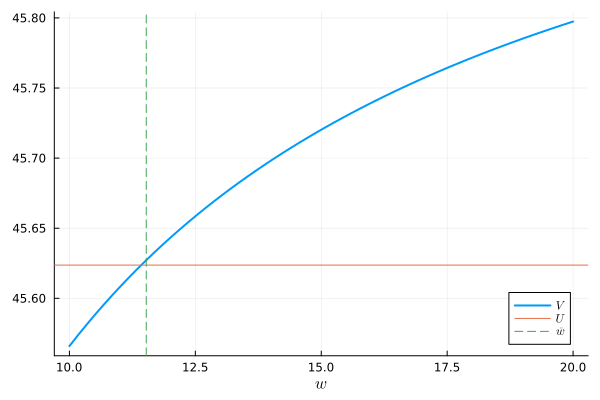

In [114]:
# model constructor
function mccall_model(;
    alpha = 0.2,
    beta = 0.98, # discount rate
    gamma = 0.7,
    c = 6.0, # unemployment compensation
    sigma = 2.0,
    w = range(10, 20, length = 60), # wage values
    dist = BetaBinomial(59, 600, 400)) # distribution over wage values
    return (; alpha, beta, sigma, c, gamma, w, dist, p = pdf.(dist, 0:length(w)-1))
end


function solve_mccall_model(mcm; U_iv = 1.0, V_iv = ones(length(mcm.w)), tol = 1e-5,
                            iter = 2_000)
    (; alpha, beta, sigma, c, gamma, w, sigma, p) = mcm
    u(c) = (c^(1 - sigma) - 1) / (1 - sigma)
    u_w = u.(w)
    u_c = u.(c)

    # Bellman operator T. Fixed point is x* s.t. T(x*) = x*
    function T(x)
        V = x[1:end-1]
        U = x[end]
        # V_p = u_w + beta * ((1 - alpha) * V .+ alpha * U), or expanding out
        V_p = [ u_w[i] + beta * ((1 - alpha) * V[i] + alpha * U) for i in 1:length(w)]
        U_p = u_c + beta * (1 - gamma) * U + beta * gamma * sum(max(U, V[i]) * p[i] for i in 1:length(w))
        return [V_p; U_p]
    end

    # value function iteration
    x_iv = [V_iv; U_iv] # initial x val
    xstar = fixedpoint(T, x_iv, iterations = iter, xtol = tol, m = 0).zero
    V = xstar[1:end-1]
    U = xstar[end]

    # compute the reservation wage
    wbarindex = searchsortedfirst(V .- U, 0.0)
    if wbarindex >= length(w) # if this is true, you never want to accept
        w_bar = Inf
    else
        w_bar = w[wbarindex] # otherwise, return the number
    end

    # return a NamedTuple, so we can select values by name
    return (;V, U, w_bar)
end

mcm = mccall_model()
sol = solve_mccall_model(mcm)

plot(mcm.w, sol.V, lw = 2, label = L"V", xlabel=L"w")
hline!(mcm.w, [sol.U], label=L"U")
vline!([sol.w_bar]; linestyle = :dash, label = L"\bar{w}")

Take the above equation, and consider a variation where there is
on-the-job searching for better jobs. With probability $\delta$ the
worker gets a job offer while employed

$$
V(w) = u(w) + \beta [(1-\alpha-\delta)V(w) + \alpha U + \delta \sum_i \max \left\{ V(w), V(w_i) \right\} p_i ]
$$

Note that the $\max$ is taken over the current wage and the arrival with
the same

$$
U = u(c) +
  \beta (1 - \gamma) U +
  \beta \gamma \sum_i \max \left\{ U, V(w_i) \right\} p_i
$$

Modify the code above to implement this new Bellman equation. Hint:
after adding the new constant, you will probably only need to change the
`u_w + beta * ((1 - alpha) * V .+ alpha * U)` function to include the
new term.

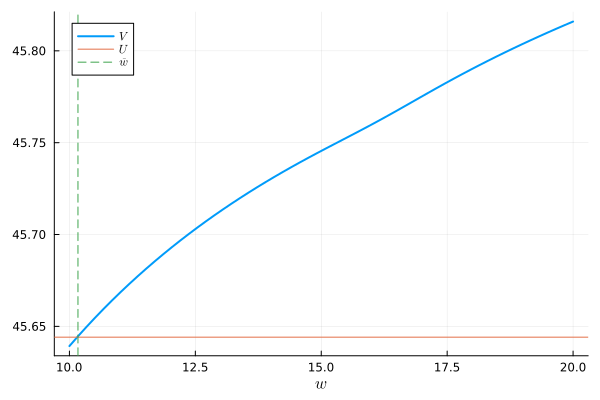

In [165]:
# edit your code here.  Hint: add parameter and look at the T operator
# model constructor
function new_mccall_model(;
    alpha = 0.2,
    beta = 0.98,
    gamma = 0.7,
    delta = 0.1, # NOTE NEW PARAMETER ADDED FOR YOU
    c = 6.0,
    sigma = 2.0,
    w = range(10, 20, length = 60),
    dist = BetaBinomial(59, 600, 400))
    return (; alpha, beta, sigma, delta, c, gamma, w, dist, p = pdf.(dist, 0:length(w)-1))
end


function new_solve_mccall_model(mcm; U_iv = 1.0, V_iv = ones(length(mcm.w)), tol = 1e-5,
                            iter = 2_000)
    (; alpha, beta, sigma, delta, c, gamma, w, sigma, p) = mcm
    u(c) = (c^(1 - sigma) - 1) / (1 - sigma)
    u_w = u.(w)
    u_c = u.(c)

# Bellman operator T. Fixed point is x* s.t. T(x*) = x*
    function T(x)
        V = x[1:end-1]
        U = x[end]
        V_p = u_w + beta * ((1 - alpha - delta) * V .+ alpha * U .+ delta * sum(max.(V, V[i]) * p[i] for i in 1:length(w)))
        U_p = u_c + beta * (1 - gamma) * U + beta * gamma * sum(max(U, V[i]) * p[i] for i in 1:length(w))
        return [V_p; U_p]
    end

    # value function iteration
    x_iv = [V_iv; U_iv] # initial x val
    xstar = fixedpoint(T, x_iv, iterations = iter, xtol = tol, m = 0).zero
    V = xstar[1:end-1]
    U = xstar[end]

    # compute the reservation wage
    wbarindex = searchsortedfirst(V .- U, 0.0)
    if wbarindex >= length(w) # if this is true, you never want to accept
        w_bar = Inf
    else
        w_bar = w[wbarindex] # otherwise, return the number
    end

    # return a NamedTuple, so we can select values by name
    return (;V, U, w_bar)
end

mcm = new_mccall_model()
sol = new_solve_mccall_model(mcm)

plot(mcm.w, sol.V, lw = 2, label = L"V", xlabel=L"w")
hline!(mcm.w, [sol.U], label=L"U")
vline!([sol.w_bar]; linestyle = :dash, label = L"\bar{w}")